# Logistic Regression

In [123]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
x = np.arange(1, 11) * 100
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [125]:
len(x)

10

In [126]:
len(y)

10

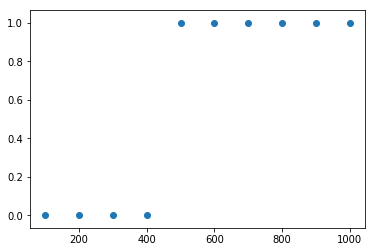

In [127]:
plt.scatter(x,y);

In [128]:
# bernoulli distribution
# the probability of getting a "1" is .6 or 60%

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
X = x.reshape(10,1)

In [131]:
m = LogisticRegression().fit(X,y)
m

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [132]:
m.intercept_, m.coef_

(array([-1.1119824]), array([[0.0041809]]))

In [133]:
b0 = m.intercept_[0]
b1 = m.coef_[0][0]

In [134]:
for i in range(70, 700, 100):
    c = m.predict([[i]])
    p = m.predict_proba([[i]])
    l = m.predict_log_proba([[i]]) # base e
    print(i, c, p, l)

70 [0] [[0.69409191 0.30590809]] [[-0.36515089 -1.18447059]]
170 [0] [[0.59898318 0.40101682]] [[-0.51252177 -0.9137519 ]]
270 [1] [[0.49578524 0.50421476]] [[-0.70161243 -0.68475299]]
370 [1] [[0.39294517 0.60705483]] [[-0.93408518 -0.49913617]]
470 [1] [[0.29879583 0.70120417]] [[-1.20799477 -0.35495619]]
570 [1] [[0.21906419 0.78093581]] [[-1.51839048 -0.24726232]]
670 [1] [[0.15587874 0.84412126]] [[-1.85867685 -0.16945913]]


In [135]:
x = np.arange(0,1000)

In [136]:
y = m.predict_proba(x.reshape(1000,1))[:,1]

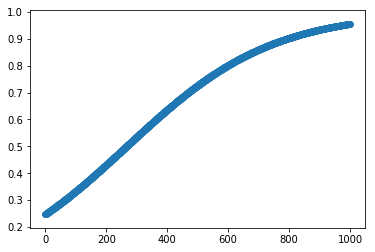

In [137]:
plt.scatter(x,y);
# sigmoid shape, showing probabilities of the majority class

In [138]:
# results from above
# 370 [1] [[0.39294517 0.60705483]] [[-0.93408518 -0.49913617]]

In [139]:
# lets calculate logodds for x = 370
logodds = b0 + (b1*370)
logodds

0.4349490111284291

In [140]:
# if we exponentiate log, then we get odds
odds = np.exp(logodds)
odds

1.5448842850366573

In [141]:
# computing probaility of "1" class from the odds, above
p = odds/(1+odds)
p

0.6070548252901818

In [142]:
# so that worked!
# the linear equation give us log odds, which we can convert to probabilities

In [143]:
# let's turn probabilities back into odds
odds = p/(1-p)
odds

1.5448842850366573

In [144]:
# and turn odds into log odds
logodds = np.log(odds)
logodds

0.4349490111284291

In [145]:
# ------------------------ #

# How it works

It takes a linear function `f(x)` and has to map it to a `Bernoulli` distribution, which is a probability.

- Probabilities go from 0 to 1
- The `odds` go from 0 to `infinity`
- The `log odds` go from `- infinity` to `+ infinity` - this is the `logit`
- $ odds = \frac{p}{1-p} $ input = 0..1, output = 0..+infinity
- $ logodds = log(odds) $ intput = 0..+infinity, output = -infinity..+infinity
- But because we want to map our linear equation to probabilities, we take `odds` and solve for `p`
- $ p = \frac{odds}{1+odds} $
- So, $ log(\frac{p}{1-p}) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 $
- We need `p` so we solve for it

## $ logit = z = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 $
## $ e^{logit} = e^z $
## $ p = \frac{e^z}{1+e^z} $
## $ p =  \frac{1}{\frac{1+e^z}{e^z}} $
## $ p = \frac{1}{1+e^{-z}} $
## This is the logistic function, or inverse logit, or sigmoid